## <a name="6">PCA from Scratch</a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
class PCA ():

    def __init__(self,n_components):
        self.n_components = n_components
        if self.n_components > 1:
            self.type = 'var'
        else:
            self.type = 'ratio'

    def fit(self,X):
        self.variance = np.var(X, axis = 0)
        
#       1.center the data
        self.mean = np.mean(X, axis = 0)
        X_new = X - self.mean
#       2.calculate the covariance matrix
        """
        numpy.cov(m, y=None,
                     rowvar=True, bias=False,
                     ddof=None, fweights=None,
                     aweights=None, *, dtype=None)
        
        A 1-D or 2-D array containing multiple variables and observations.
        Each row of m represents a variable, and each 
        column a single observation of all those variables. 
        Also see rowvar below.
        """
        cov = np.cov(X_new.T)
#       3.calculate eigenvalues of the covariance matrix
#       4.calculate eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eig(cov)
#       5.Order the eigenvectors
        """
        argsort :returns the index of the sorted array
        """
        index = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues.T
        #print(eigenvalues)
        eigenvalues = eigenvalues[index]
        #eigenvectors = eigenvectors[: , index]
        eigenvectors = eigenvectors[index].T
        #normalize eigenvalues
        eigenvalues = eigenvalues/np.sum(eigenvalues)
        #eigenvalues = np.round(eigenvalues/ np.sum(eigenvalues), 2)
        #print(eigenvalues)
#       6.calculate principle components

        if (self.n_components <=1):
            self.cumulative_sum = eigenvalues.cumsum()
            #print(self.cumulative_sum)
            #get the index at which the cumulative sum exceeded n_components
            self.ratio_index = np.where(self.cumulative_sum >=  self.n_components)[0][1]
            self.components = eigenvectors[:,0:self.ratio_index]
            #print(self.components)
            #print("eigenvalues",eigenvalues)
            self.explained_variance = eigenvalues[0:self.ratio_index]
            #print("explained variance", self.explained_variance)
        else:
            self.components = eigenvectors[:,0:self.n_components]
            self.cumulative_sum = eigenvalues.cumsum()
            self.ratio_index = self.n_components
        
        # self.components = #matrix (n,)
        return X_new

    def transform(self,Z):
        Z_new = Z - self.mean 
        Z_new = np.dot(Z_new,self.components)

        return Z_new

    #optional 
    def plot_explained_variance(self):
        plt.bar(np.arange(self.ratio_index), self.cumulative_sum[0:self.ratio_index])
        plt.axhline(self.cumulative_sum[self.ratio_index-1], color = 'red', ls = "dotted")
        plt.xlabel("Cumulative Index")
        plt.ylabel("Threshold")
        plt.title("Explained variance Plot")
        plt.show()

In [3]:
df = pd.read_csv('Clean_data.csv')
X = df.to_numpy()
pca_section = PCA(n_components=0.95)
X_transofmed = pca_section.fit(X)
X_transofmed = pca_section.transform(X)
pca_section.components #return matrix (n,4)
print(pca_section.explained_variance)#return list len = 4

[0.43153415 0.16003835 0.12774915 0.10458295 0.09506252 0.04183003]


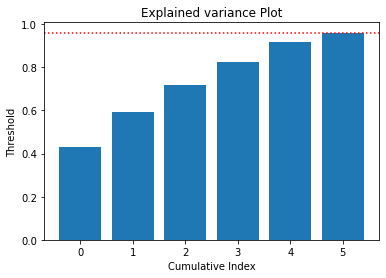

In [4]:
pca_section.plot_explained_variance()

## <a name="6">PCA using Sklearn</a>

In [5]:
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95)
pca.fit(X)
PCA(n_components=0.95)
print(pca.explained_variance_ratio_)
cumulative_sum = pca.explained_variance_.cumsum()
index_ratio = 6

[0.43153415 0.16003835 0.12774915 0.10458295 0.09506252 0.04183003]


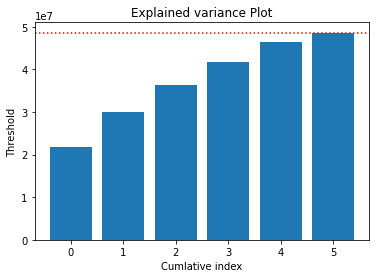

In [6]:
plt.bar( np.arange(index_ratio) , cumulative_sum[0:index_ratio])
plt.axhline(cumulative_sum[index_ratio-1], color='red', ls='dotted')
plt.xlabel("Cumlative index")
plt.ylabel("Threshold")
plt.title("Explained variance Plot")
plt.show()